In [ ]:
# In this notebook we generate the same figures as gen_all_figs.py

In [2]:
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'

import h5py
import matplotlib
#matplotlib.use('tkagg')
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.9, rc={'text.usetex': True})
sns.set_style('whitegrid')

from tqdm import tqdm
import argparse as ap
import numpy as np
import tools
import json
from pathlib import Path
import os

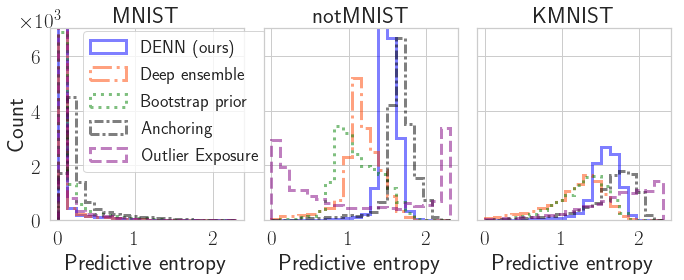

In [3]:
eval_datasets = ['mnist_final', 'notmnist_final', 'kmnist_final']
titles = ['MNIST', 'notMNIST', 'KMNIST']
maxval = 7000
save = True

# parameters
max_possible_entropy = tools.float_round(np.log(10), 2)  # entropy maximum if uniform distribution
n_bins = 20

# read config
with open(p_denn / 'config.json', 'r') as fd:
    config = json.load(fd)

# ------------------------------------------
# Visualisation of the predictive entropy
# ------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(10, 4), squeeze=False, sharey=True)

# ------------------------------------------
# Loading entropy stats for control
# ------------------------------------------
for i, (eval_dataset, title) in enumerate(zip(eval_datasets, titles)):

    ax = axes[0, i]
    
    p_deep_ensemble = [Path('log/deep_ensemble_seed:{}'.format(10*i)) for i in range(5)]
    entropy_deep_ensemble_validation = [h5py.File(p / 'stats' / '{}.h5'.format(eval_dataset), 'r') for p in p_deep_ensemble]
    tmp_entro_deep_ensemble_vals = [x.get('std') for x in entropy_deep_ensemble_validation]
    entro_deep_ensemble_vals = np.stack([ary[:] for ary in tmp_entro_deep_ensemble_vals], 0).mean(0)

    #entropy_denn_validation = h5py.File(p_denn / 'stats' / '{}.h5'.format(eval_dataset), 'r')
    #entro_denn_vals = entropy_denn_validation.get('std')
    
    p_denn = [Path('log/train:mnist_repulsive:fashionmnist_l:0.05_b:10_seed:{}/'.format(10*i)) for i in range(5)]
    entropy_denn_validation = [h5py.File(p / 'stats' / '{}.h5'.format(eval_dataset), 'r') for p in p_denn]
    tmp_denn_vals = [x.get('std') for x in entropy_denn_validation]
    entro_denn_vals = np.stack([ary[:] for ary in tmp_denn_vals], 0).mean(0)
    
    p_prior = [Path('log/prior_bs-50.0_seed:{}'.format(10*i)) for i in range(5)]
    entropy_prior_validation = [h5py.File(p / 'stats' / '{}.h5'.format(eval_dataset), 'r') for p in p_prior]
    tmp_entro_prior_vals = [x.get('std') for x in entropy_prior_validation]
    entro_prior_vals = np.stack([ary[:] for ary in tmp_entro_prior_vals], 0).mean(0)
    
    p_anchoring = [Path('log/anchoring-5.0_seed:{}'.format(10*i)) for i in range(5)]
    entropy_anchoring_validation = [h5py.File(p / 'stats' / '{}.h5'.format(eval_dataset), 'r') for p in p_anchoring]
    tmp_entro_anchoring_vals = [x.get('std') for x in entropy_anchoring_validation]
    entro_anchoring_vals = np.stack([ary[:] for ary in tmp_entro_anchoring_vals], 0).mean(0)
    
    entropy_oe_validation = h5py.File(p_oe / 'stats' / '{}.h5'.format(eval_dataset), 'r')
    entro_oe_vals = entropy_oe_validation.get('std')

    #entropy_oe_retrained = h5py.File(p_oe_retrained / 'stats' / '{}.h5'.format(eval_dataset), 'r')
    #entro_oe_retrained_vals = entropy_oe_retrained.get('std')
    p_oe_retrained = [Path('log/oe_retrained_lambda:100.0_seed:{}/'.format(i)) for i in range(5)]
    entropy_oe_retrained = [h5py.File(p / 'stats' / '{}.h5'.format(eval_dataset), 'r') for p in p_oe_retrained]
    tmp_entro_oe_retrained_vals = [x.get('std') for x in entropy_oe_retrained]
    entro_oe_retrained_vals = np.stack([ary[:] for ary in tmp_entro_oe_retrained_vals], 0).mean(0)
    

    # --------------------------------------
    # First dataset: Validation or test dataset
    # In this setting we evaluate the generalization power of our method. We don't want to be too uncertain on those values.
    # --------------------------------------
    # plt.title('Entropy histogram \non MNIST')
    ax.set_xlim(-0.1, max_possible_entropy + 0.1)
    ax.set_ylim(-0.1, maxval)
    
    sns.distplot(entro_denn_vals, hist=True, kde=False, bins=n_bins,
                 kde_kws={'shade': True, 'linewidth': 2},
                 hist_kws={"histtype": "step", 'range': (0, max_possible_entropy), 'linewidth': 3, 'log': False, 'alpha':.5},
                 color='blue',
                 label='DENN (ours)', ax=ax)

    sns.distplot(entro_deep_ensemble_vals, hist=True, kde=False, bins=n_bins,
                 kde_kws={'shade': True, 'linewidth': 2},
                 hist_kws={"histtype": "step", 'range': (0, max_possible_entropy), 'linewidth': 3, 'log': False, 'linestyle':('dashdot'), 'alpha':.5},
                 color='orangered',
                 label='Deep ensemble', ax=ax)
    
    sns.distplot(entro_prior_vals, hist=True, kde=False, bins=n_bins,
                 kde_kws={'shade': True, 'linewidth': 2},
                 hist_kws={"histtype": "step", 'range': (0, max_possible_entropy), 'linewidth': 3, 'log': False, 'linestyle':('dotted'), 'alpha':.5},
                 color='green',
                 label='Bootstrap prior', ax=ax)
    
    sns.distplot(entro_anchoring_vals, hist=True, kde=False, bins=n_bins,
                 kde_kws={'shade': True, 'linewidth': 2},
                 hist_kws={"histtype": "step", 'range': (0, max_possible_entropy), 'linewidth': 3, 'log': False, 'linestyle':(0, (3, 1, 1, 1)), 'alpha':.5},
                 color='black',
                 label='Anchoring', ax=ax)
        
#     sns.distplot(entro_oe_vals, hist=True, kde=False, bins=n_bins,
#                  kde_kws={'shade': True, 'linewidth': 2},
#                  hist_kws={"histtype": "step", 'range': (0, max_possible_entropy), 'linewidth': 5, 'log': False},
#                  color='darkgrey',
#                  label='Outlier Exposure', ax=ax)
    
        
    sns.distplot(entro_oe_retrained_vals, hist=True, kde=False, bins=n_bins,
                 kde_kws={'shade': True, 'linewidth': 2},
                 hist_kws={"histtype": "step", 'range': (0, max_possible_entropy), 'linewidth': 3, 'log': False, 'linestyle':('dashed'), 'alpha':.5},
                 color='purple',
                 label='Outlier Exposure', ax=ax)    
    
    ax.set_title(title)
    ax.set_xlabel('Predictive entropy')
    if i == 0:
        #ax.legend(loc=(.2, .2), fontsize='xx-large')
        ax.legend(loc=(.17, .25), prop={'size':18})
        ax.set_ylabel('Count')
        plt.setp(ax.get_yticklabels()[0], va='bottom')
        plt.setp(ax.get_yticklabels()[-1], va='top')
    else:
        pass
        #ax.tick_params(axis=u'both', which=u'both', length=0)
        #ax.set_ylabel('')

# Now we save / show the plot
# ax.set_aspect('equal')
fig.tight_layout()
plt.subplots_adjust(wspace = .1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
t = axes[0,0].yaxis.get_offset_text()
t.set_x(-.15)
plt.subplots_adjust(wspace=.1)

In [4]:
# Now we save the figure
figname = 'mnist_notmnist_seeds.pdf'
p_fig = Path('img') / figname
if not Path.exists(Path('img')):
    os.makedirs(Path('img'))
fig.savefig(p_fig)